#### Quantum Cryptography - Day1
# Qubit,Measurement and Quantum Randomness
Quantum Cryptography uses the principle os quantum mechanic to achieve security that is impossible with classical systems.

One of the Most important resources in cryptography is **True Randomness**.classical computer can only generate psudo-random number whereas quantum system generates "provaly random bits" due to the nature of qunatum measurement. In this notebook we will start with the most fundamental concepts:
the **Qubit** and how **Measurement**.

This form the foundational protocol like **BB84 Quantum key distribution**.
In this notebook, we will learn:
- Understand what qubit is
- create a single qubit quantum circuit
- measure qubit in Z-basis
- Use hadamard gate to create quantum randomness
- Generate random bit using the quantum measurement
- Analyse the different measurement result with diffrent shot counts
- Visualize bit distribution using matplotlib

## Import required libraries

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

## What is Qubit?
A classical bit can be either 0 or 1, while the qubit can exist in a superposition(0 and 1 both at a time).the qubit can be represent using state $\psi $

$|\psi> = \alpha |0> + \beta |1>$

where :
- $\alpha $ and $ \beta $ are probability amplitude
- $|\alpha|^2 +|\beta|^2 =1 $
When we measure Qubit it **collpses** to either 0 or 1.

### Step 1 - Create a single qubit in |0> state
By default ,a ll qubit start in the |0> state


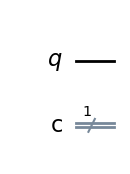

In [3]:
# create single qubit state |0> with with single Quantum and  classical bit register
qc =QuantumCircuit(1,1)
qc.draw('mpl')

##  Step 2 - Measuring in Z basis
Measurement in the Z basis checks wether the qubit is |0> or |1>. since the Qubit is curretly |0>,measurement will alwyas give 0.

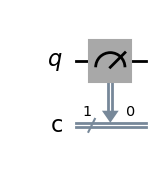

In [4]:
qc.measure(0,0)
qc.draw('mpl')

## Execute the circuit
Now we run this circuit on quantum simulator.

In [5]:
sim=AerSimulator()
result=sim.run(qc,shots=100).result()
counts=result.get_counts()
counts

{'0': 100}

## Creating Quantum Randomness(Hadamard Gate)
The Hadamard (H) gate puts the qubit into equal superposition:

$|\phi> = (|0> + |1>) / \sqrt{2} $

Now Measurement produce **True quantum Randomness**

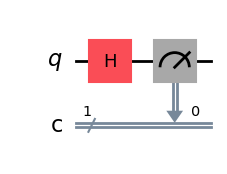

In [8]:
qc_random=QuantumCircuit(1,1)
qc_random.h(0)
qc_random.measure(0,0)
qc_random.draw('mpl')

## Run with Different Shots Counts
Running with diffrent shots  counts, we test how randomness stabilizes with more measurement:
- 100 shots
- 1000 shots
- 10,000 shots

In [39]:
Shot_list=[100,1000,10000]
results={}
for shots in Shot_list:
    job=sim.run(qc_random,shots=shots)
    result_random=job.result()
    count=result_random.get_counts()
    results[shots]=count
    print(f"{shots} shots -> {count} total ={sum(count.values())}")
    


100 shots -> {'0': 59, '1': 41} total =100
1000 shots -> {'1': 497, '0': 503} total =1000
10000 shots -> {'0': 4980, '1': 5020} total =10000


## Plot Bit Distribution
As the number of shot increses ,the distribution approches |0> and |1> with 50% of each.

100 shots -> 0:59,1:41,total:100
1000 shots -> 0:503,1:497,total:1000
10000 shots -> 0:4980,1:5020,total:10000


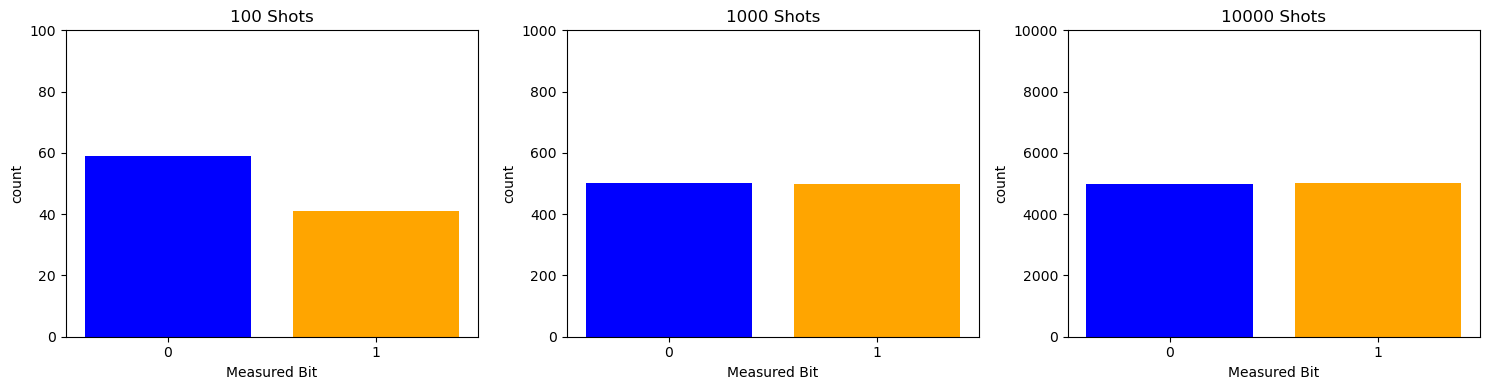

In [40]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
for ax,shots in zip(axes,Shot_list):
    
    count=results[shots]
    
    zero_count =count.get('0',0)
    one_count =count.get('1',0)

    ax.bar(['0','1'],[zero_count,one_count],color=['blue','orange'])

    ax.set_title(f"{shots} Shots")
    ax.set_xlabel("Measured Bit")
    ax.set_ylabel("count")
    ax.set_ylim(0,shots)

    print(f"{shots} shots -> 0:{zero_count},1:{one_count},total:{zero_count+one_count}")
plt.tight_layout()
plt.show()

## Cryptography Connection-Why this matter in Qunatuntum Cryptography
- The randomness you observed is **not predictable**
- Measurement outcome cannot be cloned or copied
- This randomness is used in:
    - Quantum key Distribution (BB84)
    - Secure Key Generation
    - One-Time pads

This  is the core reason quantum cryptography id provable secure.


---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day01_Qubit_and_Measurement.ipynb

**Date created**: 20-Janaury-2026

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>